In [0]:
# Mica Haney
# Suleyman Polat Olcay
# Ross Newman

In [0]:
# ! pip uninstall tensorflow
# ! pip install tensorflow --upgrade

In [3]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# Imports ----------------------------------------------------------------------
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
import random
import seaborn as sns
from sklearn.utils import shuffle
import pandas as pd
import statistics as stats

In [0]:
# Functions --------------------------------------------------------------------

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def evaluate_model(model, test_i, test_l, class_names):
    metrics = {}

    # Get predictions.
    prob_model = tf.keras.Sequential([model,
                                      tf.keras.layers.Softmax()
                                      ])
    predictions = prob_model.predict(test_i)

    # View image confidences.
    print("\nImage Confidences:")
    num_rows = 1
    num_cols = 3
    num_i = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_i):
        # plt.sublpot(figsize=(2, 2))
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], test_l, test_i)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], test_l)
    plt.tight_layout()
    plt.show()

    # Get scores.
    test_loss, test_acc = model.evaluate(test_i, test_l, verbose=2)
    print("\nTest Accuracy:\t", test_acc)
    print("Test Loss:\t", test_loss)
    metrics.update({"Test Accuracy": test_acc})
    metrics.update({"Test Loss": test_loss})

    # Get confusion matrix.
    print("\nConfusion Matrix:")
    predictions_a = []
    for row in predictions:
        predictions_a.append(np.argmax(row))
    con_mat = confusion_matrix(predictions_a, test_l, labels=range(0,10))
    con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    con_mat_df = pd.DataFrame(con_mat_norm,
                              index = class_names, 
                              columns = class_names)
    figure = plt.figure(figsize=(7, 7))
    sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")
    plt.plot()

    return metrics

In [0]:
# Get Data ---------------------------------------------------------------------
fashion_data = keras.datasets.fashion_mnist
(train_i, train_l), (test_i, test_l) = fashion_data.load_data()
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

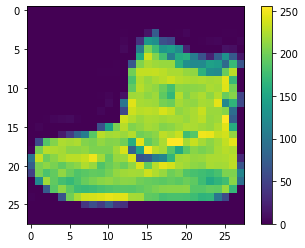

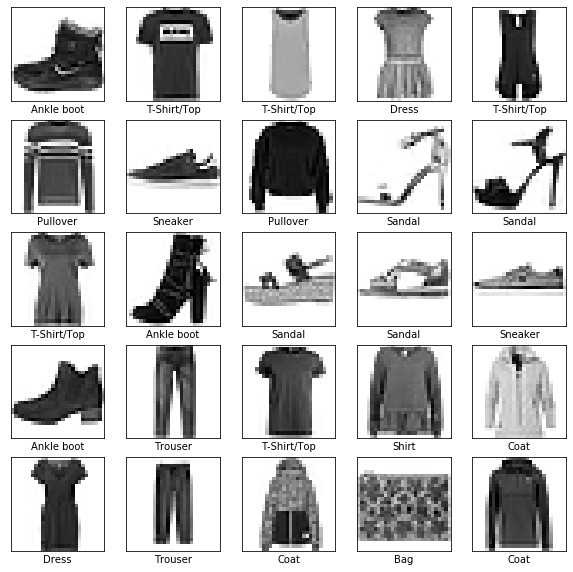

In [7]:
# Preprocess Data --------------------------------------------------------------

plt.figure()
plt.imshow(train_i[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize images.
train_i = train_i/255.0
test_i = test_i/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_i[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_l[i]])
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4950 - accuracy: 0.8258 - val_loss: 0.4567 - val_accuracy: 0.8359
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3746 - accuracy: 0.8644 - val_loss: 0.4229 - val_accuracy: 0.8486
Epoch 3/10
60000/60000 [=

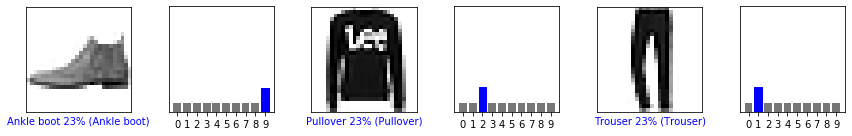

10000/10000 - 1s - loss: 0.3356 - accuracy: 0.8825

Test Accuracy:	 0.8825
Test Loss:	 0.3355542239785194

Confusion Matrix:


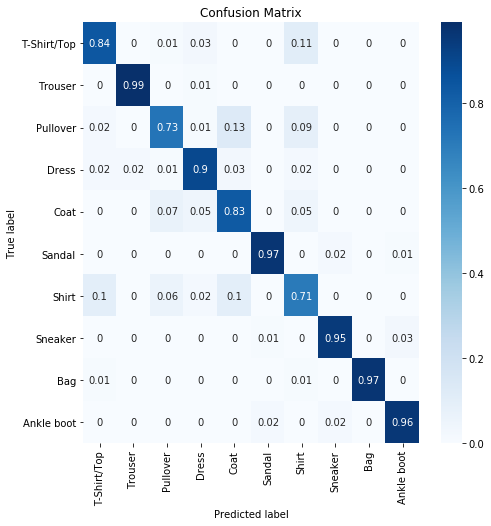

In [8]:
# Create Base Model ------------------------------------------------------------

# Build model.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation="relu"), 
                          keras.layers.Dense(10, activation="softmax")
                          ])
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
print(model.summary())
print()

# Train model.
h = model.fit(train_i, train_l, 
              epochs=10, 
              validation_data=(test_i, test_l))

# Evaluate model.
stats_base = evaluate_model(model, test_i, test_l, class_names)
stats_base.update({"Average Accuracy Over Training": stats.mean(h.history["accuracy"])})
stats_base.update({"Average Accuracy Over Validation": stats.mean(h.history["val_accuracy"])})

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4987 - accuracy: 0.8239 - val_loss: 0.4190 - val_accuracy: 0.8470
Epoch 2/10
60000/60000 [================

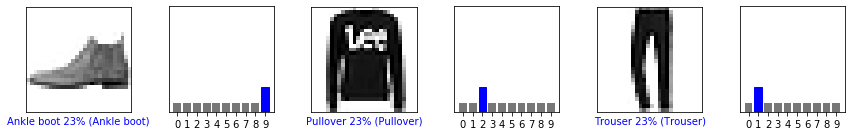

10000/10000 - 1s - loss: 0.3393 - accuracy: 0.8830

Test Accuracy:	 0.883
Test Loss:	 0.3393452103257179

Confusion Matrix:


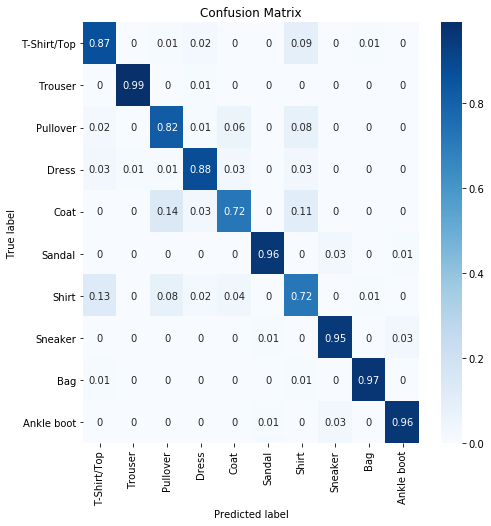

In [9]:
# Create Dropout Model ---------------------------------------------------------

# Build model.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation="relu"), 
                          keras.layers.Dropout(0.05), 
                          keras.layers.Dense(10, activation="softmax")
                          ])
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
print(model.summary())
print()

# Train model.
h = model.fit(train_i, train_l, 
              epochs=10, 
              validation_data=(test_i, test_l))

# Evaluate model.
stats_dropout = evaluate_model(model, test_i, test_l, class_names)
stats_dropout.update({"Average Accuracy Over Training": stats.mean(h.history["accuracy"])})
stats_dropout.update({"Average Accuracy Over Validation": stats.mean(h.history["val_accuracy"])})

10000/60000
20000/60000
30000/60000
40000/60000
50000/60000
60000/60000
data shuffled
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

Train on 300000 samples, validate on 10000 samples
Epoch 1/10
300000/300000 [==============================] - 27s 89us/sample - loss: 0.3637 - accuracy: 0.8688 - val_loss: 0.3730 - val_accuracy: 0.8678
Epoch 2/10
300000/300000 [==============================] - 27s 89us/sample - loss:

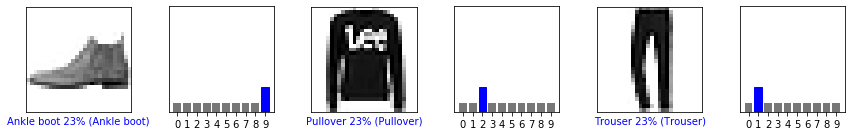

10000/10000 - 1s - loss: 0.4972 - accuracy: 0.8867

Test Accuracy:	 0.8867
Test Loss:	 0.4972108197748661

Confusion Matrix:


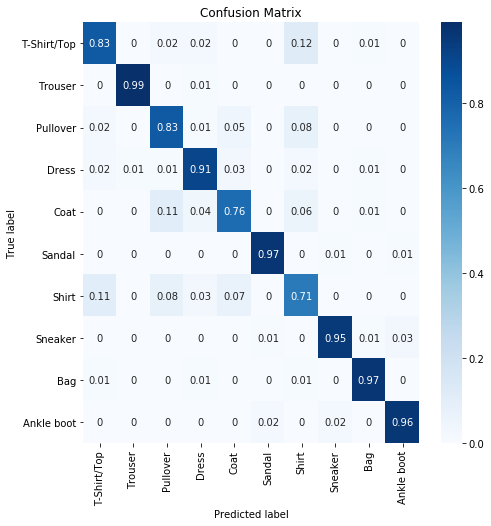

In [10]:
# Create Noise Robustness Model ------------------------------------------------

# Add to dataset.
new_i = []
new_l = []
for i, image in enumerate(train_i):
    for n in [0, 1, 1.002, 1.004, 1.006]:
        new = np.zeros((28, 28))
        for j in range(28):
            for l in range(28):
                new[j][l] = image[j][l]+random.gauss(0, 0.01)*n
        new_i.append(new)
        new_l.append(train_l[i])
    if (i+1)%10000 == 0:
        print("%d/%d"%(i+1, len(train_i)))
train_i, train_l = shuffle(np.asarray(new_i), np.asarray(new_l), random_state=3)
del new_i, new_l
print("data shuffled")

# Build model.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation="relu"), 
                          keras.layers.Dense(10, activation="softmax")
                          ])
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
print(model.summary())
print()

# Train model.
h = model.fit(train_i, train_l, 
              epochs=10, 
              validation_data=(test_i, test_l))

# Evaluate model.
stats_robust = evaluate_model(model, test_i, test_l, class_names)
stats_robust.update({"Average Accuracy Over Training": stats.mean(h.history["accuracy"])})
stats_robust.update({"Average Accuracy Over Validation": stats.mean(h.history["val_accuracy"])})

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

Train on 300000 samples, validate on 10000 samples
Epoch 1/10
300000/300000 [==============================] - 27s 91us/sample - loss: 0.3665 - accuracy: 0.8671 - val_loss: 0.3895 - val_accuracy: 0.8597
Epoch 2/10
300000/300000 [===========

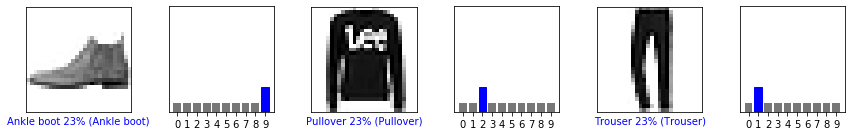

10000/10000 - 1s - loss: 0.4594 - accuracy: 0.8917

Test Accuracy:	 0.8917
Test Loss:	 0.45939174205064776

Confusion Matrix:


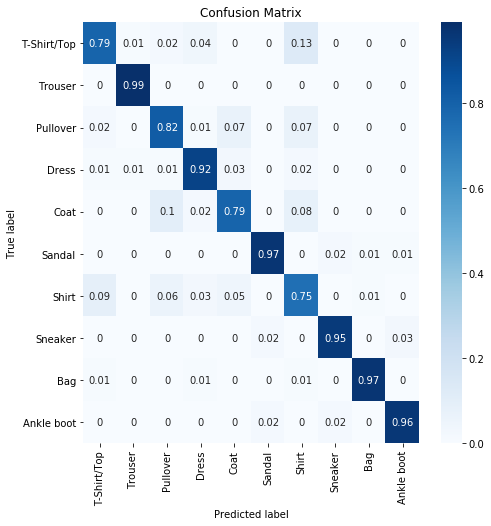

In [11]:
# Create Combined Model --------------------------------------------------------

# Add to dataset.
# Accompolished in previous cell.

# Build model.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), 
                          keras.layers.Dense(128, activation="relu"), 
                          keras.layers.Dropout(0.05), 
                          keras.layers.Dense(10, activation="softmax")
                          ])
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
print(model.summary())
print()

# Train model.
h = model.fit(train_i, train_l, 
              epochs=10, 
              validation_data=(test_i, test_l))

# Evaluate model.
stats_combine = evaluate_model(model, test_i, test_l, class_names)
stats_combine.update({"Average Accuracy Over Training": stats.mean(h.history["accuracy"])})
stats_combine.update({"Average Accuracy Over Validation": stats.mean(h.history["val_accuracy"])})

In [12]:
# Compare ----------------------------------------------------------------------
tab = []
for i, k in enumerate(stats_base.keys()):
    row = [k]
    row.append(stats_base[k])
    row.append(stats_dropout[k])
    row.append(stats_robust[k])
    row.append(stats_combine[k])
    tab.append(row)
print(tabulate(tab, headers=["Metric", "Base", "Dropout", "Robust", "Combine"]))

Metric                                Base    Dropout    Robust    Combine
--------------------------------  --------  ---------  --------  ---------
Test Accuracy                     0.8825     0.883     0.8867     0.8917
Test Loss                         0.335554   0.339345  0.497211   0.459392
Average Accuracy Over Training    0.8863     0.88304   0.932688   0.926309
Average Accuracy Over Validation  0.86836    0.87038   0.88399    0.88381
